Leyendo el archivo bank-names.txt obtenemos la siguiente información.

Las variables de entrada, el tipo de variable que son, y las clases que la conforman (en caso de que aplique).
1.   age (numérica)
2.   job : type of job (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student",  "blue-collar", "self-employed", "retired", "technician", "services")
3.   marital : marital status (categórica: "married", "divorced", "single")
4. education (categórica: "unknown", "secondary", "primary", "tertiary")
5. default: has credit in default? (binaria: "yes", "no")
6. balance: average yearly balance, in euros (numérica)
7. housing: has housing loan? (binaria: "yes", "no")
8. loan: has personal loan? (binaria: "yes", "no")
9. contact: contact communication type (categórica: "unknown", "telephone", "cellular")
10. day: last contact day of the month (numérica)
11. month: last contact month of year (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numérica)
13. campaign: number of contacts performed during this campaign and for this client (numérica, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numérica, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numérica)
16. poutcome: outcome of the previous marketing campaign (categórica: "unknown", "other", "failure", "success")

La variable de salida, de tipo binaria, por lo que se trata de un problema de clasificación.
17. y - has the client subscribed a term deposit? (binaria: "yes", "no")

In [1]:
import pandas as pd
# Se cargan los datos del archivo 'bank_marketing.csv' en una variable llamada 'data'.
data=pd.read_csv('/content/bank_marketing_RETO_DS_AS.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [2]:
# Se obtiene la información de dicha base de datos
data.info()
# Número de registros=9000.
# Total de variables=17.
# Tipo de cada variable
  # Las variables age, balance, day, duration, campaign, pdays y previous son de tipo entero.
  # Las variables y, job, marital, education, default, housing, loan, contact, month, poutcome son de tipo objeto (string).
# Dado que las 17 variables tienen 9000 valores no nulos, igual al total de registros, concluimos que no hay registros nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [3]:
# Transforma las variables categóricas de manera que puedan ser tratadas numéricamente.

# Usamos la instrucción .nunique() para contabilizar los valores de cada variable,
data.nunique()

# Basandonos en la regla empírica que dice que aquellas variables que tienen menos
# de 20 valores numéricos diferentes pueden considerarse como categóricas, y
# de lo contrario, se consideran como continuas, confirmamos que las variables categóricas son:
# job, marital, education, default, housing, loan, contact, month, poutcome
# y la variable de salida y.

age            74
job            12
marital         3
education       4
default         2
balance      3476
housing         2
loan            2
contact         3
day            31
month          12
duration     1327
campaign       34
pdays         437
previous       31
poutcome        4
y               2
dtype: int64

In [4]:
# Transformamos las variables categóricas de manera que puedan ser tratadas numéricamente.
# Justifica si utilizas LabelEncoder o OneHotEcoder.
# Para las variables marital, education, default, housing, loan, month y poutcome se usará LabelEncoder
# pues existe cierto orden entre las categorías de dichas variables.
# En este caso, el orden se asignará de la siguiente manera para cada variable:
# marital: single < divorced < married
# education: unknown < primary < secondary < tertiary
# default: credit in default yes < credit in default no
# housing: housing loan no < housing loan yes
# loan: personal loan yes < personal loan no
# month: jan < feb < mar < ... < nov <dec
# poutcome: unknown < other < failure < success
# y: the client subscribed a term deposit no <the client subscribed a term deposit yes

# Como LabelEncoder no permite definir el orden de las categorías,
# sino que en su lugar las ordena alfabéticamente, lo que no funciona en este caso,
# usaremos .replace() en su lugar

data = data.replace({"marital": {"single": 0, "divorced": 1, "married": 2},
                     "education": {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3},
                     "default": {"yes": 0, "no": 1},
                     "housing": {"no": 0, "yes": 1},
                     "loan": {"yes": 0, "no": 1},
                     "month": {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
                               "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                     "poutcome": {"unknown": 0, "other": 1, "failure": 2, "success": 3},
                     "y": {"no": 0, "yes": 1}})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   int64 
 3   education  9000 non-null   int64 
 4   default    9000 non-null   int64 
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   int64 
 7   loan       9000 non-null   int64 
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   int64 
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   int64 
 16  y          9000 non-null   int64 
dtypes: int64(15), object(2)
memory usage: 1.2+ MB


In [5]:
# Para las variables job y contact se usará OneHotEcoder
# pues no parece haber orden entre sus categorías.

data = pd.get_dummies(data, columns = ['job', 'contact'])
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                9000 non-null   int64
 1   marital            9000 non-null   int64
 2   education          9000 non-null   int64
 3   default            9000 non-null   int64
 4   balance            9000 non-null   int64
 5   housing            9000 non-null   int64
 6   loan               9000 non-null   int64
 7   day                9000 non-null   int64
 8   month              9000 non-null   int64
 9   duration           9000 non-null   int64
 10  campaign           9000 non-null   int64
 11  pdays              9000 non-null   int64
 12  previous           9000 non-null   int64
 13  poutcome           9000 non-null   int64
 14  y                  9000 non-null   int64
 15  job_admin.         9000 non-null   uint8
 16  job_blue-collar    9000 non-null   uint8
 17  job_entreprene

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,31,2,3,1,2666,0,1,10,11,318,...,0,1,0,0,0,0,0,1,0,0
1,29,0,0,1,1584,0,1,6,9,245,...,0,0,0,0,0,1,0,1,0,0
2,41,2,2,1,2152,1,1,17,11,369,...,0,0,0,0,0,0,0,1,0,0
3,50,2,2,1,84,1,1,17,7,18,...,0,0,0,0,0,0,0,1,0,0
4,40,2,2,1,0,0,1,28,7,496,...,0,0,0,0,0,0,0,1,0,0


<ipython-input-6-aba0feb2f2a1>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 1)


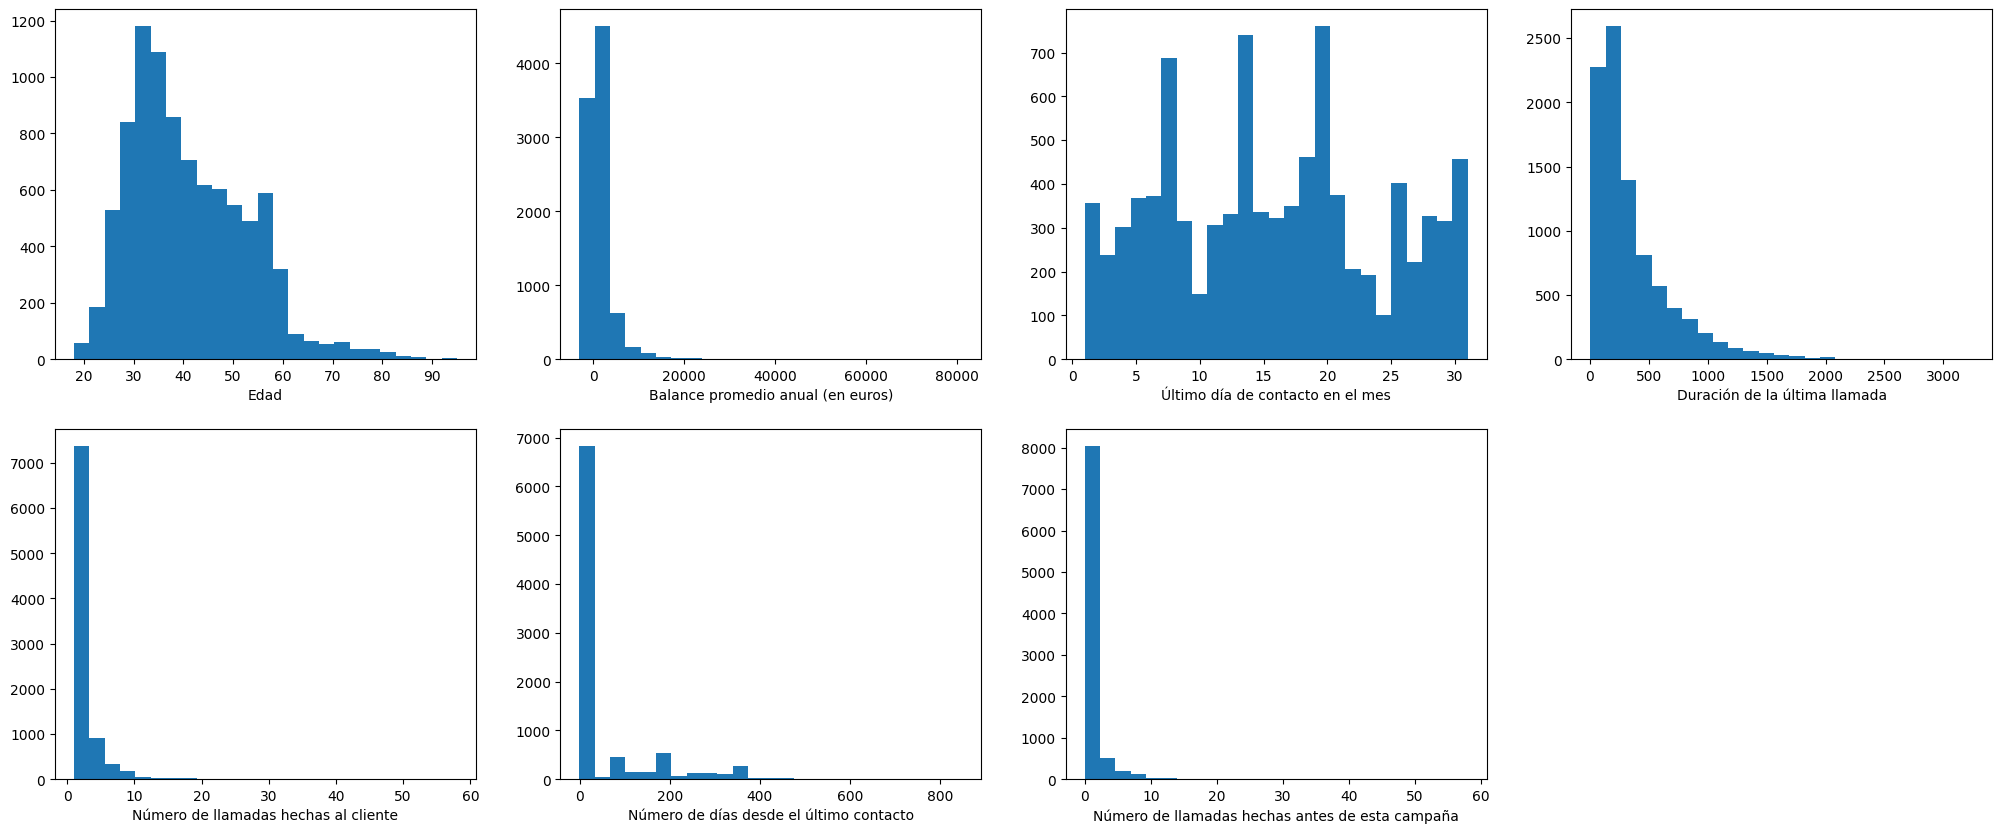

In [6]:
# Analizamos las variables numéricas en búsqueda de algún tipo de sesgo
# Para esto graficamos los histogramas de las variables age, balance, day,
# duration, campaign, pdays y previous

import numpy as np
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 10))

plt.subplot(2, 4, 1)
plt.hist(np.array(data['age']), bins=25)
plt.xlabel('Edad')

plt.subplot(2, 4, 2)
plt.hist(np.array(data['balance']), bins=25)
plt.xlabel('Balance promedio anual (en euros)')

plt.subplot(2, 4, 3)
plt.hist(np.array(data['day']), bins=25)
plt.xlabel('Último día de contacto en el mes')

plt.subplot(2, 4, 4)
plt.hist(np.array(data['duration']), bins=25)
plt.xlabel('Duración de la última llamada')

plt.subplot(2, 4, 5)
plt.hist(np.array(data['campaign']), bins=25)
plt.xlabel('Número de llamadas hechas al cliente')

plt.subplot(2, 4, 6)
plt.hist(np.array(data['pdays']), bins=25)
plt.xlabel('Número de días desde el último contacto')

plt.subplot(2, 4, 7)
plt.hist(np.array(data['previous']), bins=25)
plt.xlabel('Número de llamadas hechas antes de esta campaña')

plt.show()

<ipython-input-7-333f78b1109b>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 1)


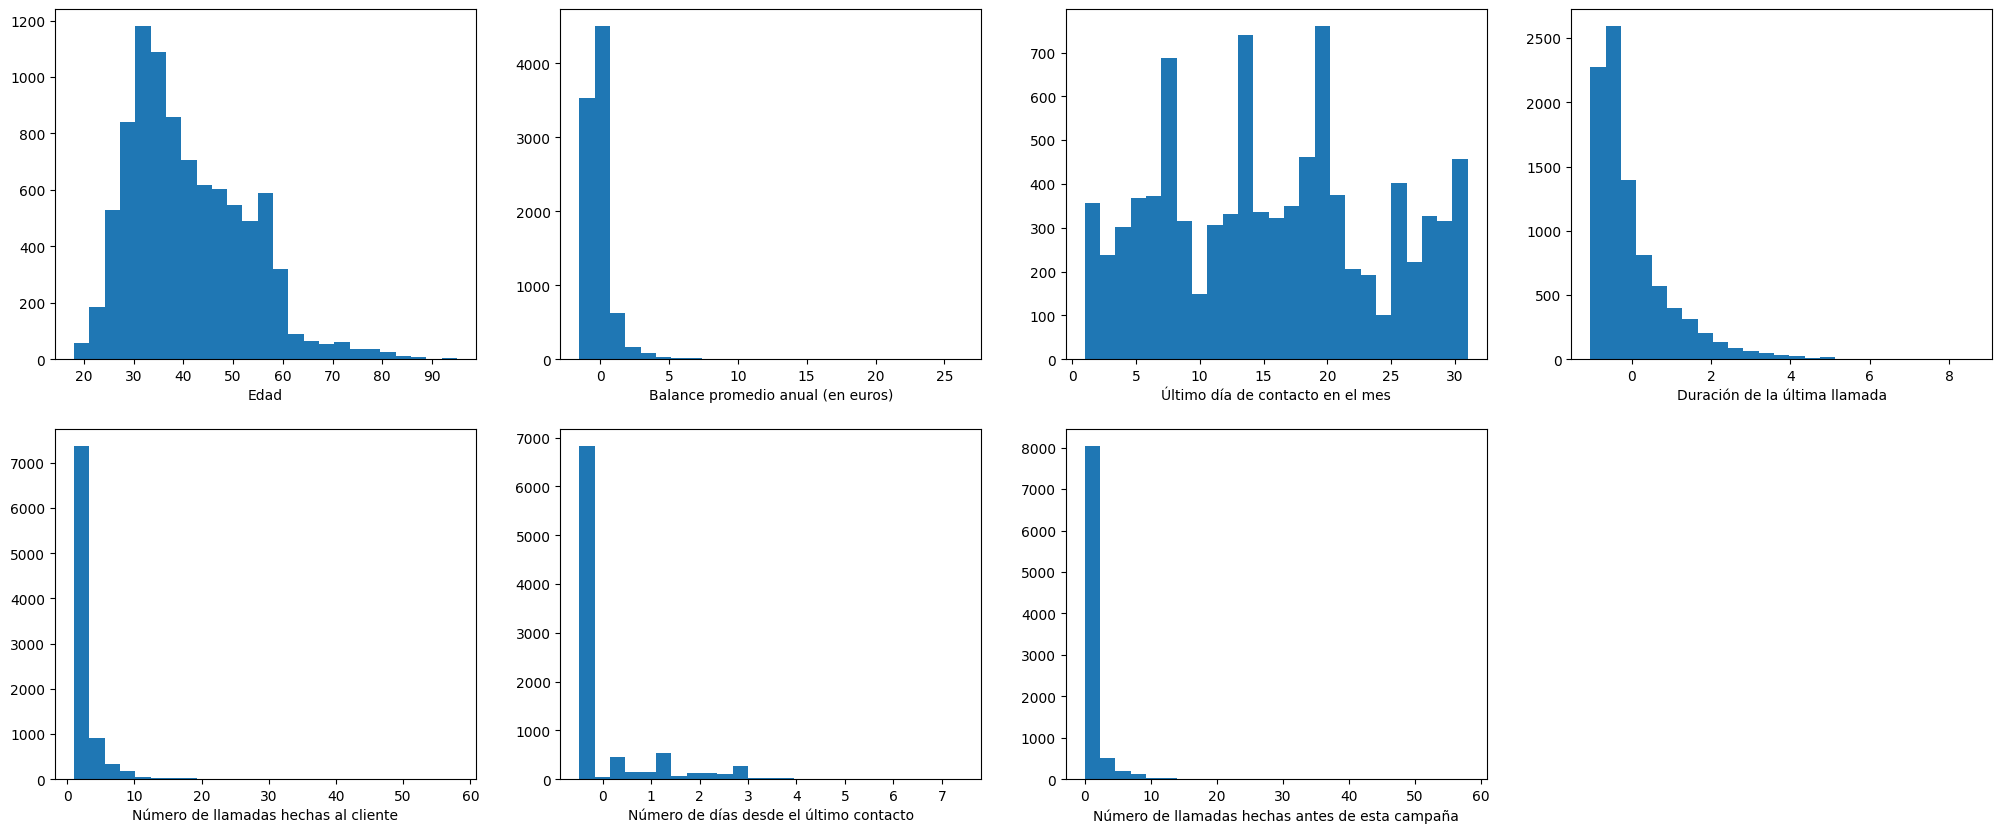

In [7]:
# Primero estandarizamos las variables balance, duration y pdays,
# que son las que tienen los rangos más amplios, y grafiquemos nuevamente

plt.subplots(figsize=(25, 10))

def est(x):
  return (x-np.mean(x))/np.std(x)

plt.subplot(2, 4, 1)
plt.hist(np.array(data['age']), bins=25)
plt.xlabel('Edad')

data['balance']=est(data['balance'])
plt.subplot(2, 4, 2)
plt.hist(np.array(data['balance']), bins=25)
plt.xlabel('Balance promedio anual (en euros)')

plt.subplot(2, 4, 3)
plt.hist(np.array(data['day']), bins=25)
plt.xlabel('Último día de contacto en el mes')

data['duration']=est(data['duration'])
plt.subplot(2, 4, 4)
plt.hist(np.array(data['duration']), bins=25)
plt.xlabel('Duración de la última llamada')

plt.subplot(2, 4, 5)
plt.hist(np.array(data['campaign']), bins=25)
plt.xlabel('Número de llamadas hechas al cliente')

data['pdays']=est(data['pdays'])
plt.subplot(2, 4, 6)
plt.hist(np.array(data['pdays']), bins=25)
plt.xlabel('Número de días desde el último contacto')

plt.subplot(2, 4, 7)
plt.hist(np.array(data['previous']), bins=25)
plt.xlabel('Número de llamadas hechas antes de esta campaña')

plt.show()

<ipython-input-8-a285c3c0bfe7>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 1)


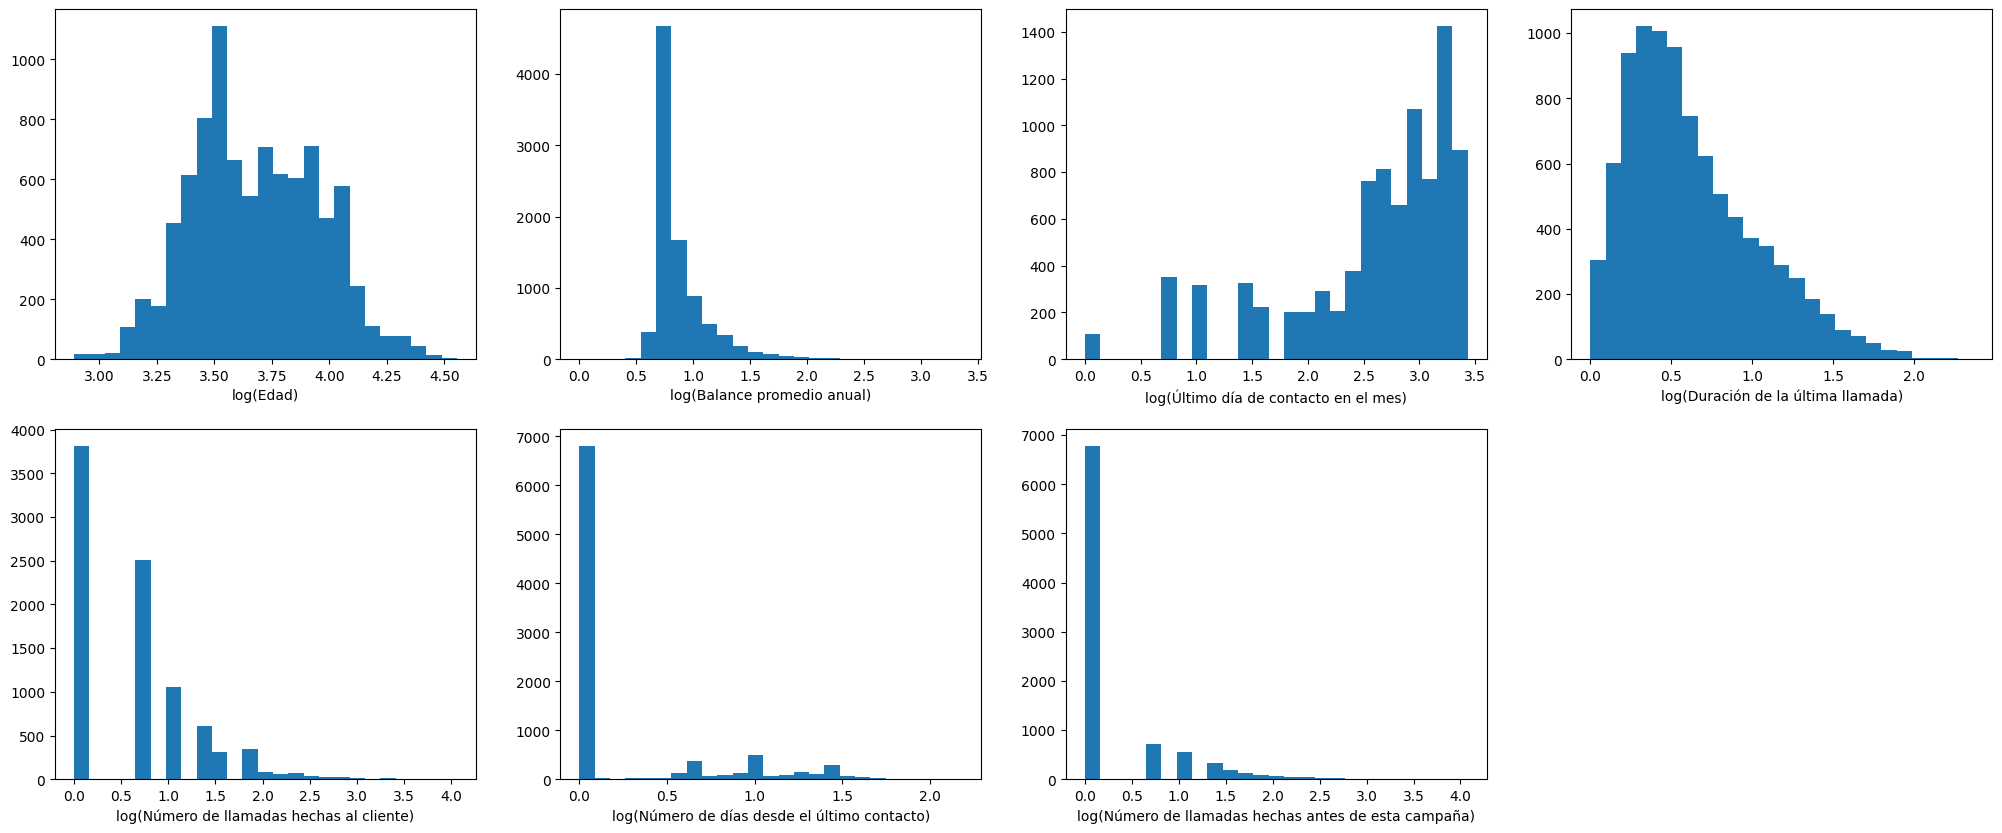

In [8]:
# Las variables age, balance, duration, campaign, pdays y previous están sesgadas a la derecha,
# por lo que aplicaremos la transformación logarítmica, y graficamos nuevamente

plt.subplots(figsize=(25, 10))

# La variable age no tiene valores negativos,
# por lo que sólo se aplica la transformación logarítmica
data['log(age)']=np.log(data['age'])
plt.subplot(2, 4, 1)
plt.hist(np.array(data['log(age)']), bins=25)
plt.xlabel('log(Edad)')

# Balance sí tiene valores negativos por lo que se suma valor absoluto del min + 1 a la variable,
# y después se aplica la transformación
data['log(balance)']=np.log(data['balance'] + 1 + abs(np.min(data['balance'])))
plt.subplot(2, 4, 2)
plt.hist(np.array(data['log(balance)']), bins=25)
plt.xlabel('log(Balance promedio anual)')

# El valor mínimo de duration es negativo, por lo que se suma valor absoluto del min1 a la variable,
# y después se aplica la transformación
data['log(duration)']=np.log(data['duration'] + 1 + abs(np.min(data['duration'])))
plt.subplot(2, 4, 4)
plt.hist(np.array(data['log(duration)']), bins=25)
plt.xlabel('log(Duración de la última llamada)')

# campaign no tiene valores negativos, por lo que sólo se aplica la transformación
data['log(campaign)']=np.log(data['campaign'])
plt.subplot(2, 4, 5)
plt.hist(np.array(data['log(campaign)']), bins=25)
plt.xlabel('log(Número de llamadas hechas al cliente)')

# pdays sí tiene valores negativos por lo que se suma el valor absoluto del min + 1 a la variable,
# y después se aplica la transformación
data['log(pdays)']=np.log(data['pdays'] + 1 + abs(np.min(data['pdays'])))
plt.subplot(2, 4, 6)
plt.hist(np.array(data['log(pdays)']), bins=25)
plt.xlabel('log(Número de días desde el último contacto)')

# El valor mínimo de previous es 0, por lo que se suma 1 a la variable,
# y después se aplica la transformación
data['log(previous)']=np.log(data['previous'] + 1)
plt.subplot(2, 4, 7)
plt.hist(np.array(data['log(previous)']), bins=25)
plt.xlabel('log(Número de llamadas hechas antes de esta campaña)')

# Por su parte, la variable day esta más sesgada a la izquierda,
# por lo que hacemos la transformación análoga y volvemos a gráficar
data['log(day)']=np.log(np.max(data['day']) + 1 - data['day'])
plt.subplot(2, 4, 3)
plt.hist(np.array(data['log(day)']), bins=25)
plt.xlabel('log(Último día de contacto en el mes)')

plt.show()

<ipython-input-9-16ea0b40895f>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 2)


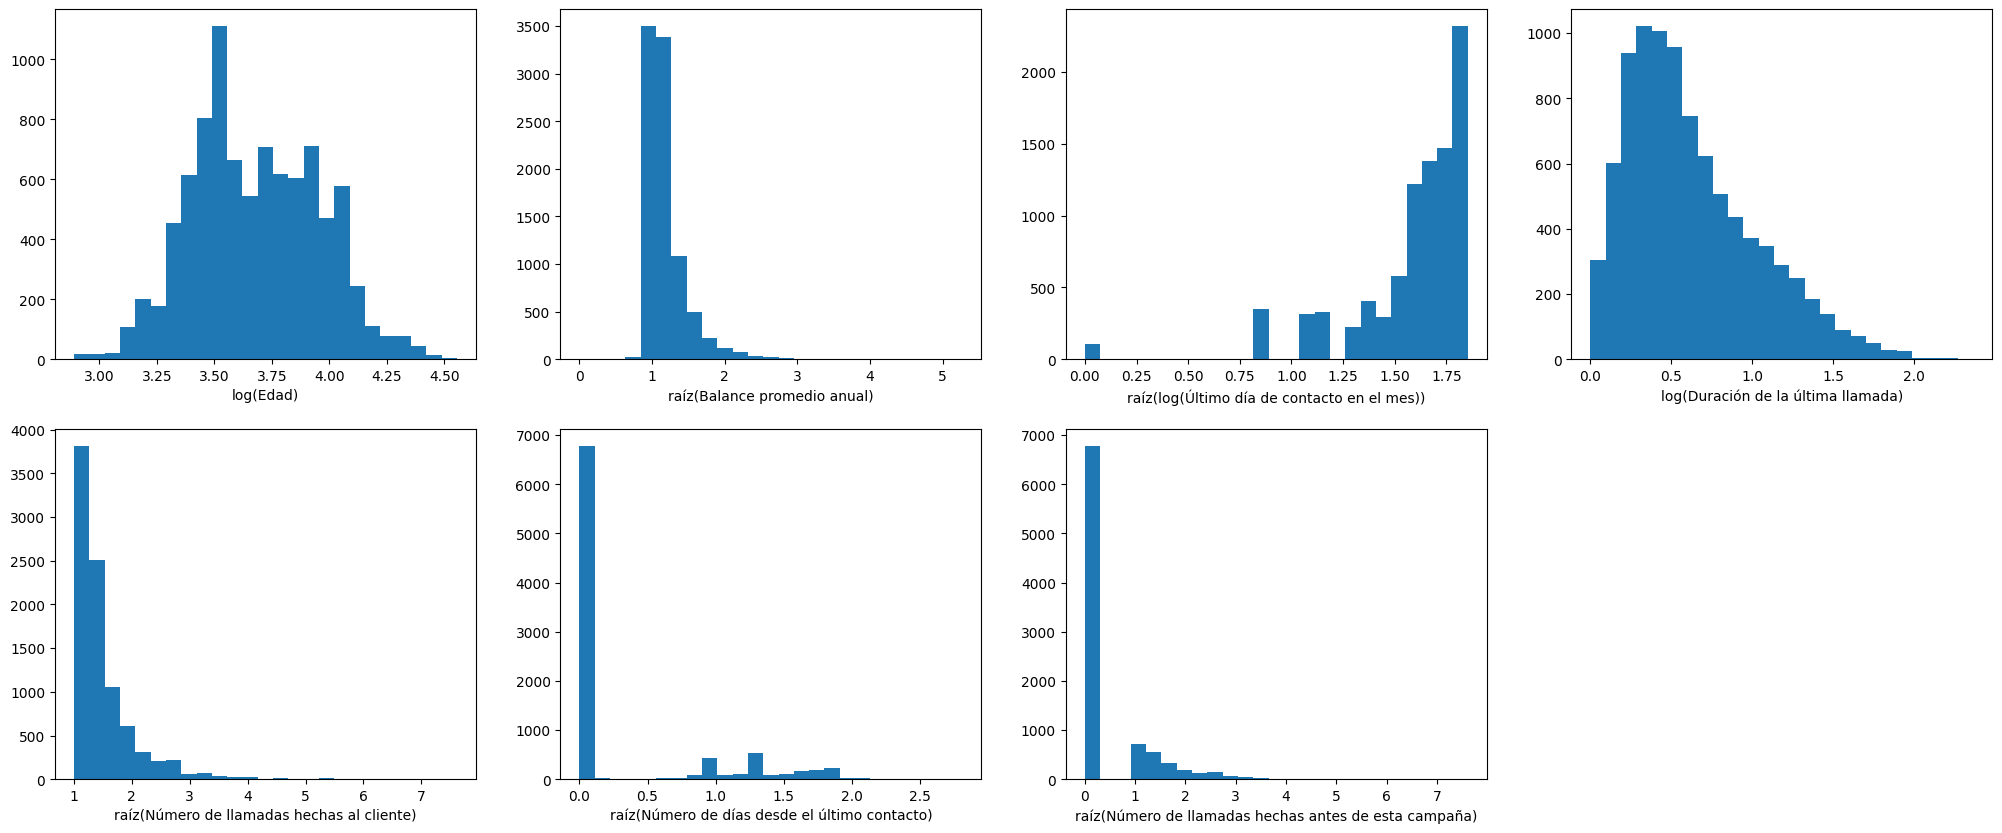

In [9]:
# La transformación logarítmica funcionó bien para las variables age y duration,
# y relativamente bien para balance,
# pero las demás mantienen un sesgo positivo,
# con excepción de day, que tiene un sesgo negativo

# Intentemos la transformación de la raíz cuadrada para balance, campaign, pdays y previous

plt.subplots(figsize=(25, 10))

# como balance sí tiene valores negativos, se suma valor absoluto del min a la variable,
# y después se aplica la transformación
data['raíz(balance)']=np.sqrt(data['balance'] + abs(np.min(data['balance'])))
plt.subplot(2, 4, 2)
plt.hist(np.array(data['raíz(balance)']), bins=25)
plt.xlabel('raíz(Balance promedio anual)')

# campaign
data['raíz(campaign)']=np.sqrt(data['campaign'])
plt.subplot(2, 4, 5)
plt.hist(np.array(data['raíz(campaign)']), bins=25)
plt.xlabel('raíz(Número de llamadas hechas al cliente)')

# pdays también tiene valores negativos por lo que se suma el valor absoluto del min a la variable,
# y después se aplica la transformación
data['raíz(pdays)']=np.sqrt(data['pdays'] + abs(np.min(data['pdays'])))
plt.subplot(2, 4, 6)
plt.hist(np.array(data['raíz(pdays)']), bins=25)
plt.xlabel('raíz(Número de días desde el último contacto)')

# previous
data['raíz(previous)']=np.sqrt(data['previous'])
plt.subplot(2, 4, 7)
plt.hist(np.array(data['raíz(previous)']), bins=25)
plt.xlabel('raíz(Número de llamadas hechas antes de esta campaña)')

# la variable log(day) esta sesgada a la izquierda,
# apliquemos la transformación raíz cuadrada
data['raíz(log(day))']=np.sqrt(data['log(day)'])
plt.subplot(2, 4, 3)
plt.hist(np.array(data['raíz(log(day))']), bins=25)
plt.xlabel('raíz(log(Último día de contacto en el mes))')

# Se mantiene la variable age con la transformación logarítmica
data['log(age)']=np.log(data['age'])
plt.subplot(2, 4, 1)
plt.hist(np.array(data['log(age)']), bins=25)
plt.xlabel('log(Edad)')

# Se mantiene la variable duration con la transformación logarítmica
data['log(duration)']=np.log(data['duration'] + 1 + abs(np.min(data['duration'])))
plt.subplot(2, 4, 4)
plt.hist(np.array(data['log(duration)']), bins=25)
plt.xlabel('log(Duración de la última llamada)')

plt.show()

<ipython-input-10-37eccee779e9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 2)


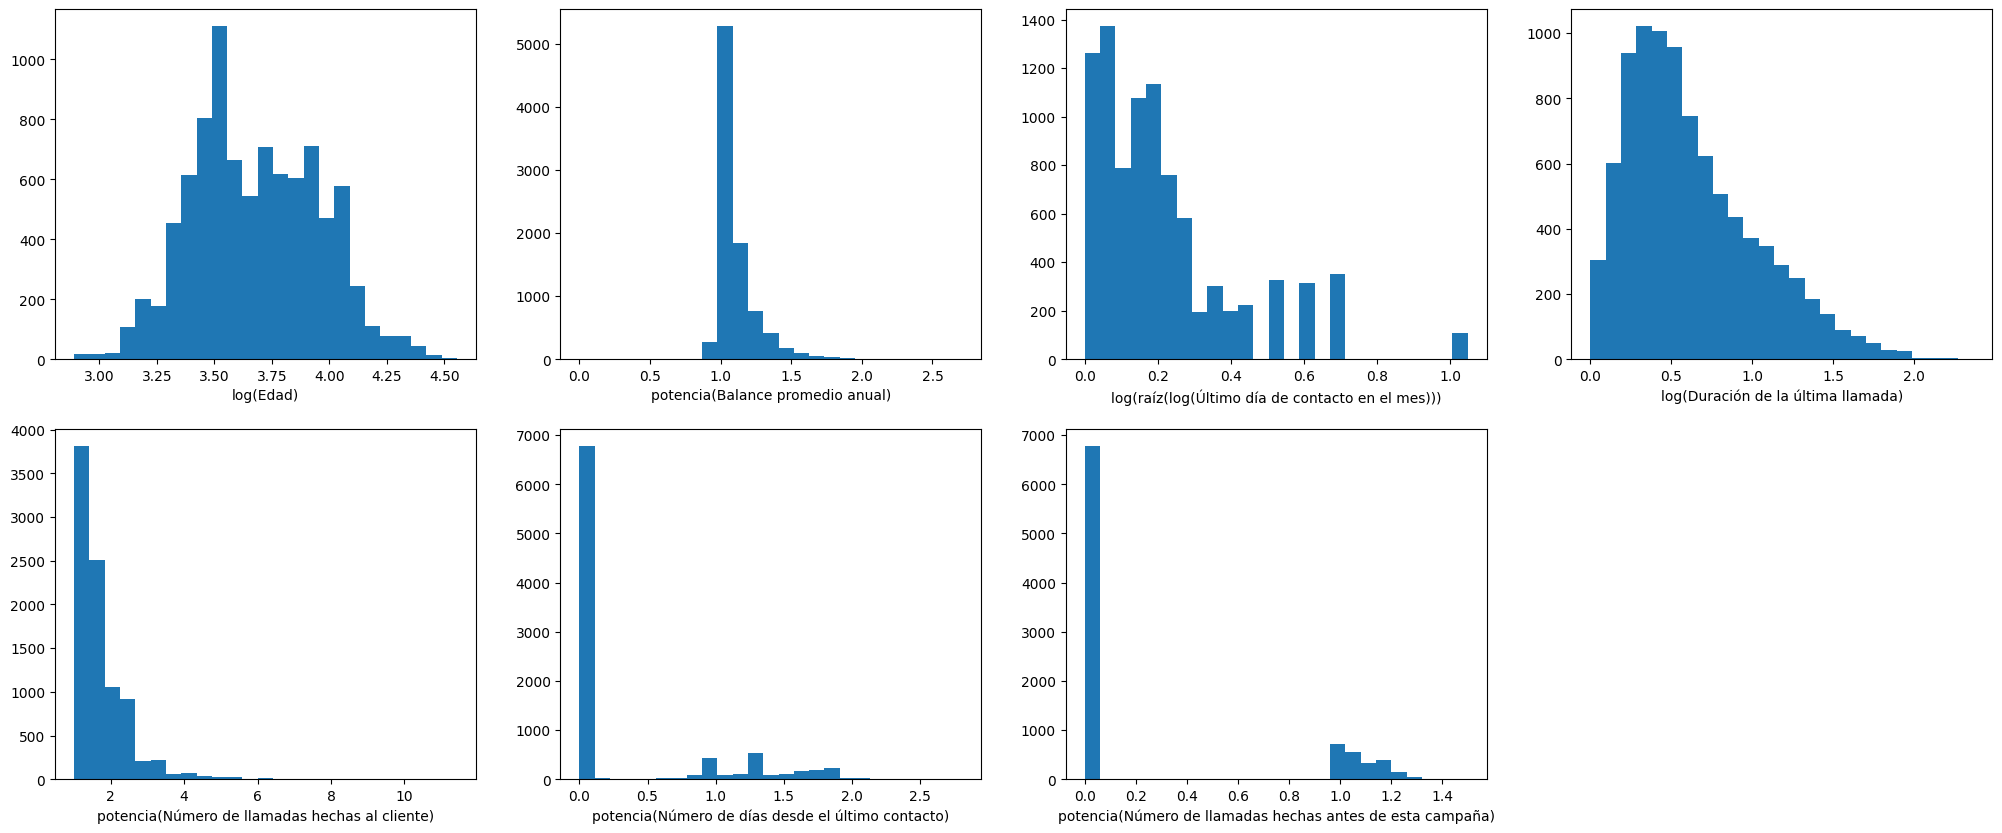

In [10]:
# Las variables balance, campaign, pdays y previous siguen sesgadas a la derecha
# Intentemos la transformación potencia

plt.subplots(figsize=(25, 10))

# balance
data['potencia(balance)']=np.power(data['balance']+abs(np.min(data['balance'])), .3)
plt.subplot(2, 4, 2)
plt.hist(np.array(data['potencia(balance)']), bins=25)
plt.xlabel('potencia(Balance promedio anual)')

# campaign
data['potencia(campaign)']=np.power(data['campaign'], .6)
plt.subplot(2, 4, 5)
plt.hist(np.array(data['potencia(campaign)']), bins=25)
plt.xlabel('potencia(Número de llamadas hechas al cliente)')

# pdays
data['potencia(pdays)']=np.power(data['pdays']+abs(np.min(data['pdays'])), .5)
plt.subplot(2, 4, 6)
plt.hist(np.array(data['potencia(pdays)']), bins=25)
plt.xlabel('potencia(Número de días desde el último contacto)')

# previous
data['potencia(previous)']=np.power(data['previous'], .1)
plt.subplot(2, 4, 7)
plt.hist(np.array(data['potencia(previous)']), bins=25)
plt.xlabel('potencia(Número de llamadas hechas antes de esta campaña)')

# raíz(log(day)) esta sesgada a la izquierda,
# intentemos la transformación logarítmica
data['log(raíz(log(day)))']=np.log(np.max(data['raíz(log(day))'])+1-data['raíz(log(day))'])
plt.subplot(2, 4, 3)
plt.hist(np.array(data['log(raíz(log(day)))']), bins=25)
plt.xlabel('log(raíz(log(Último día de contacto en el mes)))')

# Se mantiene la variable age con la transformación logarítmica
data['log(age)']=np.log(data['age'])
plt.subplot(2, 4, 1)
plt.hist(np.array(data['log(age)']), bins=25)
plt.xlabel('log(Edad)')

# Se mantiene la variable duration con la transformación logarítmica
data['log(duration)']=np.log(data['duration'] + 1 + abs(np.min(data['duration'])))
plt.subplot(2, 4, 4)
plt.hist(np.array(data['log(duration)']), bins=25)
plt.xlabel('log(Duración de la última llamada)')

plt.show()

<ipython-input-11-23afcc866424>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 5)


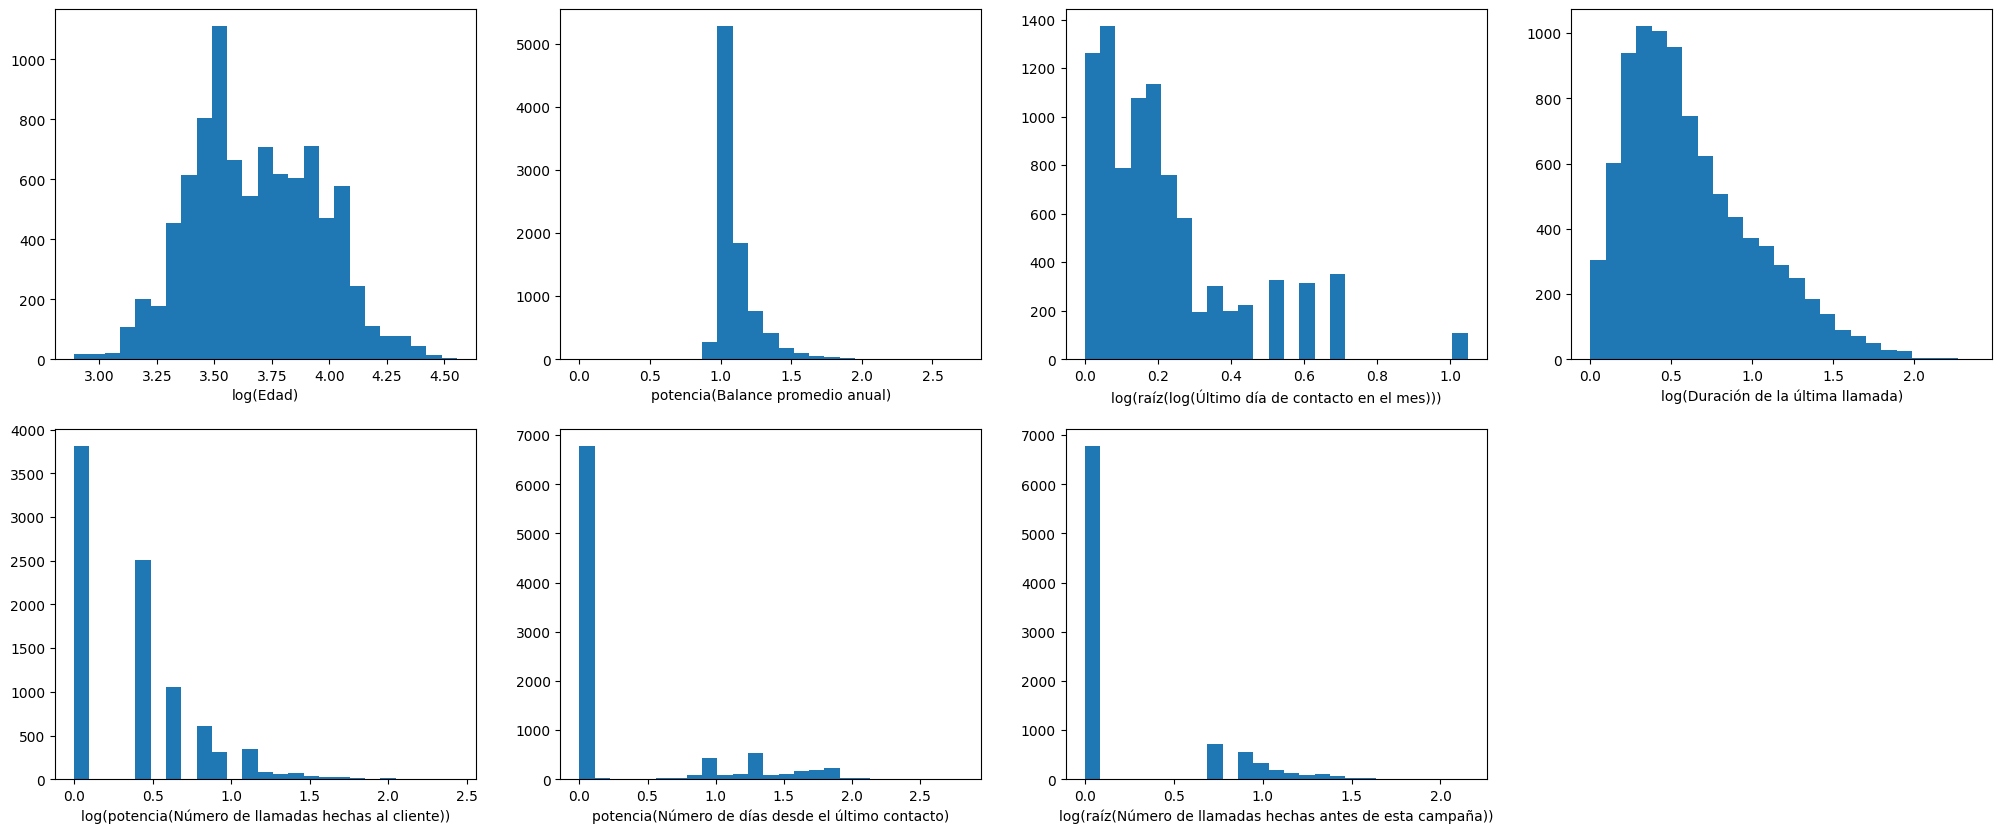

In [11]:
# Estas últimas transformaciones fueron las que mejor funcionaron para las variables,
# aunque day, campaign y previous mantienen un sesgo positivo
# Intentemos una última transformación para campaign y previous

plt.subplots(figsize=(25, 10))

# Apliquemos la transformación logarítmica a la variable potencia(campaign)
data['log(potencia(campaign))']=np.log(data['potencia(campaign)'])
plt.subplot(2, 4, 5)
plt.hist(np.array(data['log(potencia(campaign))']), bins=25)
plt.xlabel('log(potencia(Número de llamadas hechas al cliente))')

# Apliquemos la transformación logarítmica a la variable raíz(previous)
data['log(raíz(previous))']=np.log(data['raíz(previous)']+1)
plt.subplot(2, 4, 7)
plt.hist(np.array(data['log(raíz(previous))']), bins=25)
plt.xlabel('log(raíz(Número de llamadas hechas antes de esta campaña))')

# Se mantiene la variable age con la transformación logarítmica
data['log(age)']=np.log(data['age'])
plt.subplot(2, 4, 1)
plt.hist(np.array(data['log(age)']), bins=25)
plt.xlabel('log(Edad)')

# Se mantiene la variable duration con la transformación logarítmica
data['log(duration)']=np.log(data['duration'] + 1 + abs(np.min(data['duration'])))
plt.subplot(2, 4, 4)
plt.hist(np.array(data['log(duration)']), bins=25)
plt.xlabel('log(Duración de la última llamada)')

# Se mantiene la variable balance con la transformación potencia
data['potencia(balance)']=np.power(data['balance']+abs(np.min(data['balance'])), .3)
plt.subplot(2, 4, 2)
plt.hist(np.array(data['potencia(balance)']), bins=25)
plt.xlabel('potencia(Balance promedio anual)')

# Se mantiene la variable log(raíz(log(day)))
data['log(raíz(log(day)))']=np.log(np.max(data['raíz(log(day))'])+1-data['raíz(log(day))'])
plt.subplot(2, 4, 3)
plt.hist(np.array(data['log(raíz(log(day)))']), bins=25)
plt.xlabel('log(raíz(log(Último día de contacto en el mes)))')

# Se mantiene la variable pdays con la transformación potencia
data['potencia(pdays)']=np.power(data['pdays']+abs(np.min(data['pdays'])), .5)
plt.subplot(2, 4, 6)
plt.hist(np.array(data['potencia(pdays)']), bins=25)
plt.xlabel('potencia(Número de días desde el último contacto)')

plt.show()

<ipython-input-12-b29eeaeaa07e>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 1)


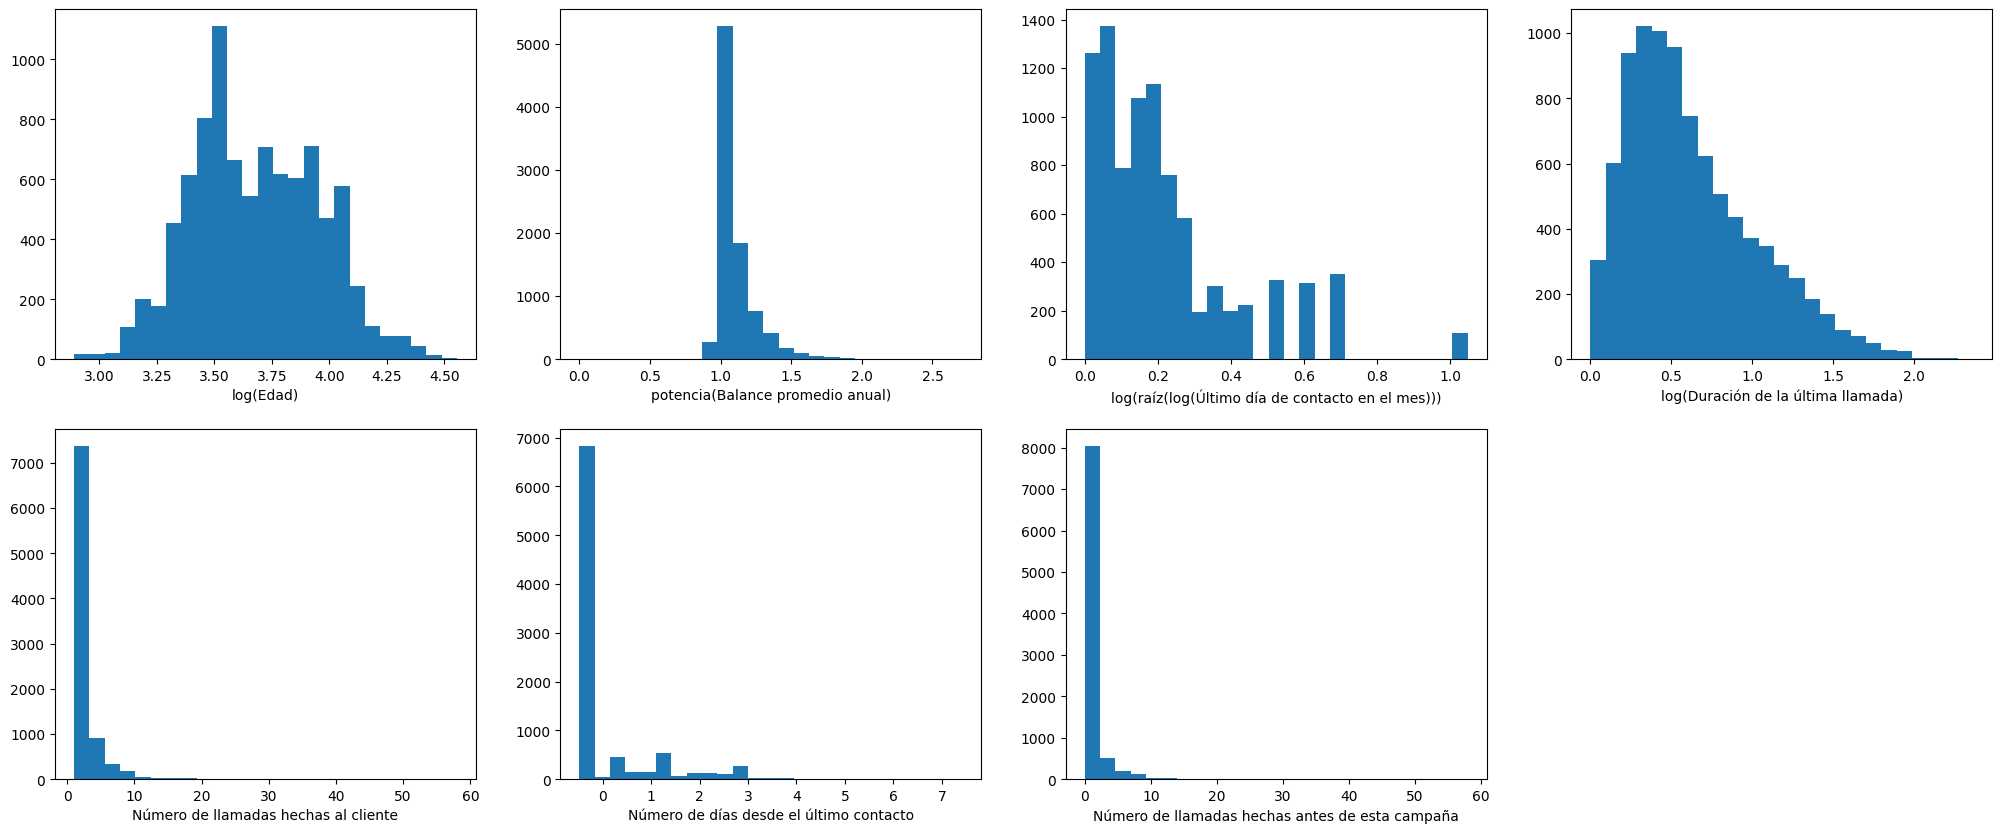

In [12]:
# En las variables campaign, pdays y previous no se consiguió mejorar el sesgo,
# por lo que nos quedamos con las variables originales
# Al final, las transformaciones quedaron como sigue:

plt.subplots(figsize=(25, 10))

# Se mantiene la variable age con la transformación logarítmica
data['log(age)']=np.log(data['age'])
plt.subplot(2, 4, 1)
plt.hist(np.array(data['log(age)']), bins=25)
plt.xlabel('log(Edad)')

# Se mantiene la variable balance con la transformación potencia
data['potencia(balance)']=np.power(data['balance']+abs(np.min(data['balance'])), .3)
plt.subplot(2, 4, 2)
plt.hist(np.array(data['potencia(balance)']), bins=25)
plt.xlabel('potencia(Balance promedio anual)')

# Se mantiene la variable log(raíz(log(day)))
data['log(raíz(log(day)))']=np.log(np.max(data['raíz(log(day))'])+1-data['raíz(log(day))'])
plt.subplot(2, 4, 3)
plt.hist(np.array(data['log(raíz(log(day)))']), bins=25)
plt.xlabel('log(raíz(log(Último día de contacto en el mes)))')

# Se mantiene la variable duration con la transformación logarítmica
data['log(duration)']=np.log(data['duration'] + 1 + abs(np.min(data['duration'])))
plt.subplot(2, 4, 4)
plt.hist(np.array(data['log(duration)']), bins=25)
plt.xlabel('log(Duración de la última llamada)')

# Se mantiene la variable campaign original
plt.subplot(2, 4, 5)
plt.hist(np.array(data['campaign']), bins=25)
plt.xlabel('Número de llamadas hechas al cliente')

# Se mantiene la variable pdays original
plt.subplot(2, 4, 6)
plt.hist(np.array(data['pdays']), bins=25)
plt.xlabel('Número de días desde el último contacto')

# Se mantiene la variable previous original
plt.subplot(2, 4, 7)
plt.hist(np.array(data['previous']), bins=25)
plt.xlabel('Número de llamadas hechas antes de esta campaña')

plt.show()

In [13]:
ceros=data['y'].value_counts()/len(data['y'])
print('La variable de salida tiene ' + str(ceros[0]) + '% de 0s y ' + str(ceros[1]) + '% de 1s.')
# Buscamos una exactitud mayor a 0.5792222222222222

La variable de salida tiene 0.5792222222222222% de 0s y 0.42077777777777775% de 1s.


In [14]:
# Asignamos la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
X = data[['log(age)','job_admin.','job_blue-collar','job_entrepreneur',
       'job_housemaid','job_management','job_retired','job_self-employed',
       'job_services','job_student','job_technician','job_unemployed',
       'job_unknown','marital','education','default','potencia(balance)',
       'housing','loan','contact_cellular','contact_telephone',
       'contact_unknown','log(raíz(log(day)))','month','log(duration)',
       'campaign','pdays','previous','poutcome']]
y = data[['y']]

In [15]:
# Particionamos  los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X,y,train_size=0.6)
X_test, X_val, y_test, y_val = train_test_split(X_test_val,y_test_val,train_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5400, 29) (1800, 29) (1800, 29) (5400, 1) (1800, 1) (1800, 1)


In [16]:
# Aplicamos el modelo Regresión Logística en el conjunto de entrenamiento.

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
model.fit(X_train, np.ravel(y_train))

LogisticRegression(solver='newton-cg')

Regresión Logística:
Exactitud (accuracy) con el conjunto de validación =  0.8061111111111111


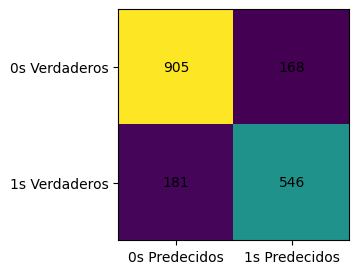

In [17]:
# Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión

print("Regresión Logística:\nExactitud (accuracy) con el conjunto de validación = ",\
model.score(X_val,y_val))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val, model.predict(X_val))
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Predecidos', '1s Predecidos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Verdaderos', '1s Verdaderos'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [18]:
# Ajusta los parámetros del modelo hasta obtener tu mejor resultado.
# Definamos diferentes rangos de opciones para algunos parámetros del modelo de regresión
# logística mediante un diccionario

parameters={'C':[0.15,0.24,0.39,0.46],
           'penalty':['l2','elasticnet','l1'],
           'solver':('newton-cg','saga','lbfgs','sag')}

from sklearn.model_selection import GridSearchCV
model_grid=LogisticRegression(max_iter=15000)
modelo_model_grid=GridSearchCV(model_grid, parameters)

modelo_model_grid.fit(X_train, np.ravel(y_train))

# print(modelo_model_grid)
print("Los mejores valores encontrados son %s con un score de %0.2f"
  %(modelo_model_grid.best_params_, modelo_model_grid.best_score_))
print(modelo_model_grid.score(X_val,y_val))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Los mejores valores encontrados son {'C': 0.24, 'penalty': 'l1', 'solver': 'saga'} con un score de 0.81
0.7994444444444444


Regresión Logística:
Exactitud (accuracy) con el conjunto de validación =  0.7994444444444444


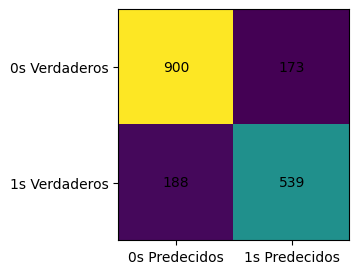

In [19]:
# Verificamos que la combinación obtenida sea válida
modelo_grid=LogisticRegression(C=0.24,penalty='l1',solver='saga',max_iter=10000)
modelo_grid.fit(X_train, np.ravel(y_train))
print("Regresión Logística:\nExactitud (accuracy) con el conjunto de validación = ",\
modelo_grid.score(X_val,y_val))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val, modelo_grid.predict(X_val))
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Predecidos', '1s Predecidos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Verdaderos', '1s Verdaderos'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

Red neuronal:
Exactitud (accuracy) con el conjunto de validación =  0.82


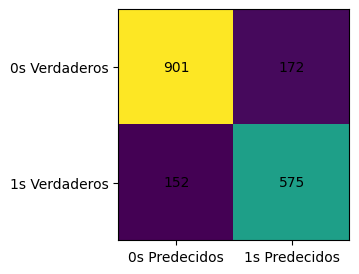

In [20]:
# Aplicamos ahora el modelo Red Neuronal en el conjunto de entrenamiento.
from sklearn.neural_network import MLPClassifier
modelo_RN=MLPClassifier(hidden_layer_sizes=(9,3), max_iter=10000, alpha =0.7)
modelo_RN.fit(X_train, np.ravel(y_train))

# Validamos el modelo con las predicciones del conjunto de validación y su matriz de confusión.
print("Red neuronal:\nExactitud (accuracy) con el conjunto de validación = ",\
modelo_RN.score(X_val,y_val))

cm=confusion_matrix(y_val, modelo_RN.predict(X_val))
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Predecidos', '1s Predecidos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Verdaderos', '1s Verdaderos'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [21]:
# Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.
# Se define el vector de neuronas que tendrán cada una de las dos capas ocultas en cada iteración
neuronas = [i for i in range(1, 49, 6)]
alpha=[0.3,0.5,0.6,0.7,0.9]
# definimos e inicializamos las listas donde estarás guardando la
# información de la exactitud de los conjuntos de entrenamiento y prueba
train_scores, val_scores = list(), list()

# se iniciará el ciclo FOR sobre cada valor “i” del vector “neuronas”,
# que indica la cantidad de neuronas que tendrá cada capa oculta.
for i in neuronas:
  for j in alpha:
    model = MLPClassifier(hidden_layer_sizes=(2*i,i),
                      max_iter=3000,
                      alpha=j,
                      random_state=99)
    model.fit(X_train, np.ravel(y_train))
    # prueba
    train_score=model.score(X_train,y_train)
    train_scores.append(train_score)
    # validación
    val_score=model.score(X_val,y_val)
    val_scores.append(val_score)

    # evolución de las métricas durante el entrenamiento...
    print('> layer size: %.1f, alpha:%.1f   \t trainacc: %.3f, valacc: %.3f'
      % (i, j, train_score, val_score))

> layer size: 1.0, alpha:0.3   	 trainacc: 0.814, valacc: 0.806
> layer size: 1.0, alpha:0.5   	 trainacc: 0.814, valacc: 0.808
> layer size: 1.0, alpha:0.6   	 trainacc: 0.815, valacc: 0.807
> layer size: 1.0, alpha:0.7   	 trainacc: 0.814, valacc: 0.804
> layer size: 1.0, alpha:0.9   	 trainacc: 0.812, valacc: 0.808
> layer size: 7.0, alpha:0.3   	 trainacc: 0.847, valacc: 0.819
> layer size: 7.0, alpha:0.5   	 trainacc: 0.840, valacc: 0.825
> layer size: 7.0, alpha:0.6   	 trainacc: 0.841, valacc: 0.826
> layer size: 7.0, alpha:0.7   	 trainacc: 0.841, valacc: 0.828
> layer size: 7.0, alpha:0.9   	 trainacc: 0.824, valacc: 0.821
> layer size: 13.0, alpha:0.3   	 trainacc: 0.855, valacc: 0.826
> layer size: 13.0, alpha:0.5   	 trainacc: 0.857, valacc: 0.822
> layer size: 13.0, alpha:0.6   	 trainacc: 0.853, valacc: 0.822
> layer size: 13.0, alpha:0.7   	 trainacc: 0.854, valacc: 0.821
> layer size: 13.0, alpha:0.9   	 trainacc: 0.846, valacc: 0.818
> layer size: 19.0, alpha:0.3   	 t

Red neuronal:
Exactitud (accuracy) con el conjunto de validación =  0.8233333333333334


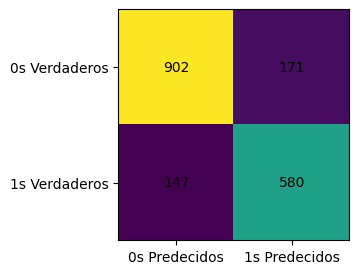

In [22]:
# La mejor combinación fue layer_size=43, alpha=0.3
modelo_RN_grid=MLPClassifier(hidden_layer_sizes=(86,43), max_iter=10000, alpha =0.3)
modelo_RN_grid.fit(X_train, np.ravel(y_train))

# Validamos el modelo con las predicciones del conjunto de validación y su matriz de confusión.
print("Red neuronal:\nExactitud (accuracy) con el conjunto de validación = ",\
modelo_RN_grid.score(X_val,y_val))

cm=confusion_matrix(y_val, modelo_RN_grid.predict(X_val))
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Predecidos', '1s Predecidos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Verdaderos', '1s Verdaderos'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

Red neuronal:
Exactitud (accuracy) con el conjunto de prueba =  0.81


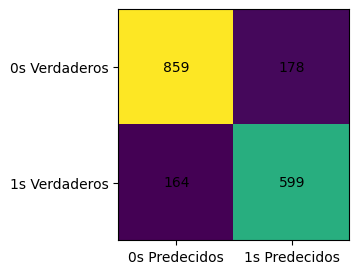

In [23]:
# Selecciona el mejor modelo encontrado en los incisos anteriores.
# Basándonos en los resultados obtenidos anteriormente, el mejor modelo
# fue la red neuronal modelo_RN_grid, con dos capas ocultas, la primera con 86 neuronas y la segunda con 43,
# y un valor de alpha de 0.3
# Ahora, sobre este modelo, utilizamos el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.
# El modelo predice correctamente el 81.0% de los datos del conjunto de prueba
print("Red neuronal:\nExactitud (accuracy) con el conjunto de prueba = ",\
modelo_RN_grid.score(X_test,y_test))

cm=confusion_matrix(y_test, modelo_RN_grid.predict(X_test))
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Predecidos', '1s Predecidos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Verdaderos', '1s Verdaderos'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()